# Project 2. Financial Analysis with Python

In financial analysis, it is a common practice to estimate or test claims on stocks' real mean return based on historical data called a sample. In this project, you will conduct statistical inference on the mean return of a stock of your choice. Please fill in your selection on [a Google sheet](https://docs.google.com/spreadsheets/d/15diyZL9XzbveSDpqZWtE01fMF5JJJ9AZrmbcvoVVRG8/edit?usp=sharing). Avoid repeating existing selections.

This project consists of three parts. In Part 1, you will retrieve the stock and the S&P 500 Index's 3-year historical data, compute their daily log returns, and visualize the returns' distributions. You will also use the historical data to compute the coefficient of correlation between the daily log returns of the stock and the S&P 500 Index, and then estimate the stock's Beta (a measure of a stock's volatility) under the assumption that the S&P 500 Index represents the market.     

In Part 2, you will use the historical data as a sample to build the 80 percent and 95 percent confidence intervals for the stock's (population) mean daily log return, respectively. Based on the confidence interval estimates, can you conclude that the (population) mean daily log return is positive?

In Part 3, you will use the historical data to test the claim that the stock generates a higher (or a lower) mean daily log return than the S&P 500 Index at the significant levels of 5% and 10%, respectively. What conclusions can be drawn? 

In both Part 2 and Part 3, the normal distribution can be applied to approximate the t-distribution. 

In [6]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
from datetime import datetime
import scipy.stats as stats
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
%matplotlib inline

## Part 1
### Retrieving AMD and S&P500 historical 3 years data

In [7]:
#Getting the past 3 years data for both the stock and S&P 500
amd = yf.download('AMD',  '2019-12-04', '2022-12-02')
sp500 = yf.download('SPY', '2019-12-04','2022-12-02')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
amd.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-04,39.380001,39.820000,39.130001,39.689999,39.689999,44299400
2019-12-05,39.950001,40.220001,39.549999,39.619999,39.619999,35574000
2019-12-06,40.099998,40.189999,39.560001,39.630001,39.630001,31101400
2019-12-09,39.459999,39.840000,38.910000,38.930000,38.930000,27928100
2019-12-10,39.200001,39.730000,38.820000,39.439999,39.439999,33733600


In [9]:
amd.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-25,75.669998,76.040001,74.750000,75.139999,75.139999,26018900
2022-11-28,73.809998,75.470001,72.570000,73.190002,73.190002,45383800
2022-11-29,73.620003,74.489998,72.779999,73.389999,73.389999,51846400
2022-11-30,73.379997,77.699997,72.809998,77.629997,77.629997,88468400
2022-12-01,78.309998,79.230003,76.440002,77.480003,77.480003,59833400


In [362]:
sp500.head() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-04,312.119995,310.320007,310.700012,311.459991,49080000.0,296.815399
2019-12-05,312.250000,310.579987,312.230011,312.019989,40709000.0,297.349091
2019-12-06,315.309998,314.109985,314.119995,314.869995,48927000.0,300.065094
2019-12-09,315.179993,313.799988,314.440002,313.880005,34838500.0,299.121643
2019-12-10,314.549988,312.809998,313.820007,313.529999,52649800.0,298.788116


In [363]:
sp500.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-28,400.809998,395.109985,399.089996,395.910004,67881600.0,395.910004
2022-11-29,397.299988,393.299988,396.049988,395.230011,52310000.0,395.230011
2022-11-30,407.679993,393.480011,395.489990,407.679993,144566700.0,407.679993
2022-12-01,410.000000,404.750000,408.769989,407.380005,76398200.0,407.380005
2022-12-02,407.859985,402.140015,402.250000,406.910004,85273900.0,406.910004


In [364]:
#Checking for the null values in both the dataframes
print(amd.isnull().sum()); print(sp500.isnull().sum())

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [365]:
#We now check if the sizes of both the dataframes are same
print(amd.shape[0]);print(sp500.shape[0])

756
756


### Visualizations

Text(0.5, 1.0, 'Advanced Micro Devices (AMD) Index close')

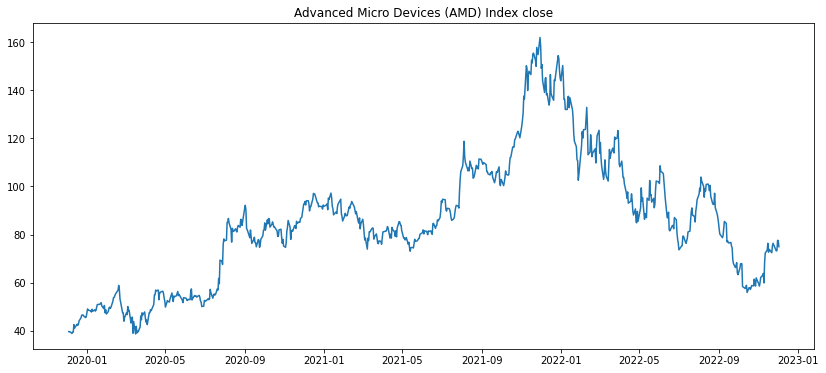

In [366]:
#Plotting the closing values of the AMD stock for last 3 years
plt.figure(figsize = (14,6))
plt.plot(amd['Close'])
plt.title("Advanced Micro Devices (AMD) Index close")

In [367]:
#Computing the daily log returns for the AMD and creating the new column
amd['LogR'] = np.log(amd['Close'].shift(-1)/amd['Close'])

In [368]:
#We check the null values introduced because of shifting
amd.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
LogR         1
dtype: int64

In [369]:
#removing the row with null value
amd.dropna(axis = 0, inplace = True)

In [370]:
#check null values again
amd.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
LogR         0
dtype: int64

Text(0.5, 1.0, 'AMD daily log returns distribution')

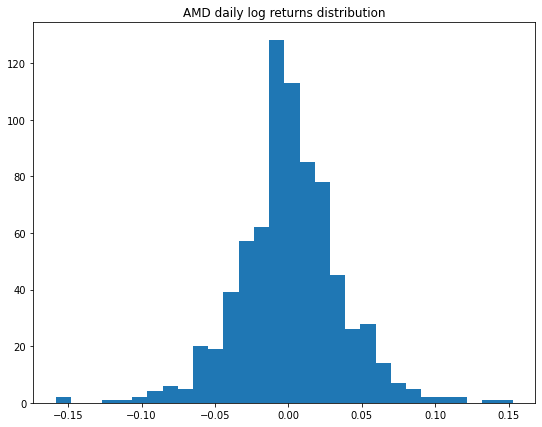

In [371]:
#Plotting the distribution of the AMD daily Log returns
plt.figure(figsize = (9,7))
plt.hist(amd['LogR'],bins=30)
plt.title('AMD daily log returns distribution')

In [372]:
amd.shape[0]

755

Text(0.5, 1.0, 'S&P 500 Index close')

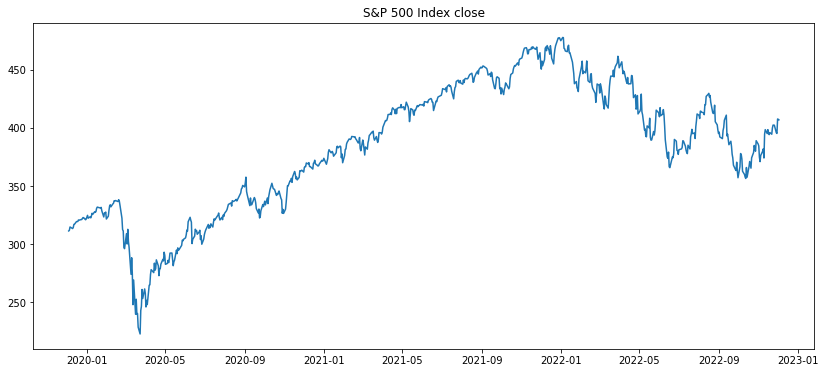

In [373]:
#Plotting the closing values for S&P 500 for 3 years
plt.figure(figsize = (14,6))
plt.plot(sp500['Close'])
plt.title("S&P 500 Index close")

In [374]:
#Creating the column of daily log returns for S&P500
sp500['LogR'] = np.log(sp500['Close'].shift(-1)/sp500['Close'])

In [375]:
#Checking the Null values
sp500.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
LogR         1
dtype: int64

In [376]:
#Removing the null values
sp500.dropna(axis = 0, inplace = True)

In [377]:
#Again checking if there are any
sp500.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
LogR         0
dtype: int64

Text(0.5, 1.0, 'S&P 500 daily log returns distribution')

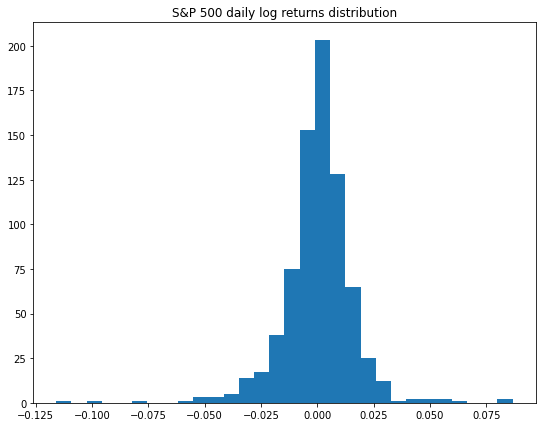

In [378]:
#Plotting the distribution of daily log returns of S&P 500
plt.figure(figsize = (9,7))
plt.hist(sp500['LogR'],bins=30)
plt.title('S&P 500 daily log returns distribution')

In [379]:
#Both the sizes are now same i.e. 755
print(amd.shape[0])
sp500.shape[0]

755


755

### Coefficient of correlation between AMD and SnP500

In [380]:
amd['LogR'].corr(sp500['LogR'])

0.6736604464954408

### Covariance between them to calculate the Beta and Variance of the SnP500 

In [381]:
covariance=amd['LogR'].cov(sp500['LogR'])
covariance

0.0003716843270240496

In [382]:
variance_SP500=sp500['LogR'].var()
variance_SP500

0.00024866753219812194

### Beta 

In [383]:
beta_amd=(covariance)/(variance_SP500)
beta_amd

1.494703887308923

#### Beta of the stock suggests that our stock is nearly 50% more volatile than the market. That means it will go 50% more up thann index and 50% more down than the index 

# Part 2

### Calculating the confidence intervals 95% and 80%

In [384]:
#calculating necessarry statistics
amd_mean =np.mean(amd['LogR']) # mean of log returns
print("AMD Stock's mean=",amd_mean)
amd_std = np.std(amd['LogR']) #standard dev of log returns
print("AMD Stock's std=",amd_std)

AMD Stock's mean= 0.0008425459918996972
AMD Stock's std= 0.034965186939624734


In [385]:
#getting the z values for both the intervals
z05 = norm.ppf(1 - 0.05/2)
print(z05)
z20 = norm.ppf(1 - 0.2/2)
print(z20)

1.959963984540054
1.2815515655446004


In [386]:
#calculating the 95 % confidence interval
lower_limit_95 = amd_mean-z05*(amd_std)/(np.sqrt(len((amd['LogR']))))
upper_limit_95 = amd_mean+z05*(amd_std)/(np.sqrt(len((amd['LogR']))))

#95% Confidence Interval 
print('3 years historical data with 95% confidence inverval:', lower_limit_95, '  ', upper_limit_95)
#Check to see if AMD mean lies within the confidence interval
if lower_limit_95 < amd_mean < upper_limit_95:
    print ('yes') 
else:
    print('no')

3 years historical data with 95% confidence inverval: -0.001651534524640335    0.003336626508439729
yes


In [387]:
lower_limit_80 = amd_mean-z20*(amd_std)/(np.sqrt(len((amd['LogR']))))
upper_limit_80 = amd_mean+z20*(amd_std)/(np.sqrt(len((amd['LogR']))))
# 80% Confidence Interval 
print('3 years of historical data with 80% confidence inverval:', lower_limit_80,'  ',upper_limit_80)
if lower_limit_80 < amd_mean < upper_limit_80:
    print ('yes')
else: 
    print('no')


3 years of historical data with 80% confidence inverval: -0.0007882456021184143    0.002473337585917809
yes


### Based on the results of both the 95 and 80 percent confidence intervals, we can not say that the population mean daily log return is positive as the lower limits are below 0.

# Part 3

### Performing the hypothesis tests 

In [388]:
stats.t.ppf(q=0.025,  # t value for 5% significance below which we will reject null hyppothesis
            df=754)  # Degrees of freedom

-1.963115203500959

In [389]:
stats.t.ppf(q=0.975, df=754)  #t value, above which we would reject null hypothesis

1.9631152035009585

In [390]:
stats.t.ppf(q=0.05, df=754) # for 10  percent significance lower side

-1.6468770413228044

In [391]:
stats.t.ppf(q=0.95, df=754) # for 10 percent upper side

1.6468770413228038

In [392]:
sp500_mean=np.mean(sp500['LogR'])
mu  = sp500_mean
mu0 = amd_mean
diff_mean=mu0-mu
print("Mean of S&P500 daily log return=",mu)
print("Mean of AMD daily log return",mu0)
print("Difference in mean of daily log return between AMD and S&P500",diff_mean)

Mean of S&P500 daily log return= 0.0003540677458758062
Mean of AMD daily log return 0.0008425459918996972
Difference in mean of daily log return between AMD and S&P500 0.000488478246023891


In [393]:

#Null Hypothesis -> Difference in mean daily log return of AMD and S&P500 is equal to 0. 
#Alternate Hypothesis -> Difference in mean daily log return of AMD and S&P greater than 0.
#H0: (mu0-mu=0) , where U=mean of S&P 500 daily log return and U0=mean of AMD daily log return
#H1: (mu0-mu>0)

#Performing One Sample T-test to investigate 
#if the mean of the daily log return of AMD is statistically different(greater or lesser) 
#from a known hypothesised S&P500 mean daily log return
#Assuming the data is normally distributed to apply t-test'''
ttest_results = ttest_1samp(a=amd['LogR'],popmean=diff_mean)
print(ttest_results)


def test_result(p, ref_pvalue=0.05):
    
    if p<ref_pvalue:
        return "Reject null hypothesis"
    else:
        return "Fail to reject null hypothesis"




#T-test result for 5% significance level or 95% confidence level
print('T-test result for 5% significance level: ',test_result(ttest_results[1],0.05))

#T-test result for 10% significance level or 90% confidence level
print('T-test result for 10% significance level: ',test_result(ttest_results[1],0.10))

Ttest_1sampResult(statistic=0.2780585057088363, pvalue=0.7810436771830815)
T-test result for 5% significance level:  Fail to reject null hypothesis
T-test result for 10% significance level:  Fail to reject null hypothesis


#### The test statistic is t is 0.279, this tells us how much the sample mean deviates from the null hypothesis.

#### The test's p-value of 0.781, which is way high, and we have less evidence against null hypothesis, which means there is a 78% chance we would see sample data this far apart if the two groups tested are actually identical.

#### The t statistic is also within the 5% and 10% (critical t values) we calculated above. Which are |1.96| and |1.64| respectively so we can't reject null hypothesis.

#### Also on top of that

#### At 5 percent significance level, we would fail to reject the null hypothesis, since p-value is greater than 5% significance value.

#### Similarly for 10% significance level, we would fail to reject the null hypothesis since p-value is greater than 10% significance value.

#### We fail to reject the null hypothesis at both 5% and 10% siginifcance levels, that is the difference in mean in log daily return for AMD and S&P500 is not statistically significant. 

# Part 3: Another Test

### Paired samples t -test

In [394]:
diff_mean_R =(amd['LogR']-sp500['LogR'])
diff_R_std =diff_mean_R.std() #standard deviation of the differences in log returns
diff_R_std 

0.027008972841142388

In [395]:
# We assume same null and alternative hypothesis here as previous
t = diff_mean/(diff_R_std/np.sqrt(len(amd))) # t statistic
t

0.4969476431027288

In [396]:
p= norm.cdf(t)  #p value
p

0.690387013461016

In [397]:
stats.ttest_rel(amd['LogR'], sp500['LogR']) #using the inbuilt library we can verify

Ttest_relResult(statistic=0.4969476431027288, pvalue=0.6193708355336663)

### In this case also we have the p value greater than 5% and 10%. So we fail to reject the null hypothesis and there is no significant difference between the log returns of SnP500 and AMD stock
### Also t statistic is within the critical values 1.96 and 1.64.
### Although we have deviation of sample mean 0.49 which is less in this case too.